In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import plot_tree

In [2]:
data = pd.read_csv(r"C:\Users\TEJKIRAN\Downloads\Fraud.csv")
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
list(data)

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [31]:
display(data.head())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


I noted that there is a very large volume of data to be analyzed, there are more than 6.3 million lines divided into 1 dependent variable (isFraud) 
and 10 independent variables.

From the dataset dictionary that there is no information about oldbalanceDest and newbalanceDest for customers starting with M (Merchants). 
However, it has already been noticed that these values are filled with the value 0. As this value does not represent the reality of the information, 
I will delete these records by replacing them with the NaN value (missing value) so that we can visualize the statistics more clearly.

In [40]:
#Checking if the Merchant is recipient or not
ls = []
for Dest in data['nameDest'].values:
    if Dest[0] == 'M':
        merchant = 1
    else:
        merchant = 0
    ls.append(merchant)

data['destMerchant'] = ls

In [45]:
#Delete oldbalanceDest and newbalanceDest information from merchants and fill with NaN
data['oldbalanceDest'] = data['oldbalanceDest'].where(data['destMerchant'] == 0, other=np.nan)
data['newbalanceDest'] = data['newbalanceDest'].where(data['destMerchant'] == 0, other=np.nan)

In [46]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,destMerchant
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,NaN,NaN,0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,NaN,NaN,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,NaN,NaN,0,0,1


Due to the size of the dataset, it was not computationally possible to identify the missing values. But after our fix on the oldbalanceDest and newbalanceDest columns, we are aware of their existence. For now we will not worry about this information and will keep it that way.

In [50]:
display(data.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.00,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.94,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.00,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.00,1.442584e+05,4.958504e+07
oldbalanceDest,4211125.0,1.663058e+06,4.064780e+06,0.0,139659.05,551247.21,1.692951e+06,3.560159e+08
newbalanceDest,4211125.0,1.850856e+06,4.386080e+06,0.0,221717.59,683724.79,1.910979e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.00,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.00,0.000000e+00,1.000000e+00
destMerchant,6362620.0,3.381461e-01,4.730786e-01,0.0,0.00,0.00,1.000000e+00,1.000000e+00


Now, we will check the need for nameOrig and nameDest information, since they are just customer ID's.
As in the data dictionary it was not clear whether these ID's refer to the person or the account itself, let's check if occasionally transactions can occur between the same ID's.

In [55]:
# As nameOrig and nameDest represents customer identity, which is unrelevant, to use this for model training. We can remove nameOrig and nameDest
data = data.drop(['nameOrig', 'nameDest'], axis=1)

In [56]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,destMerchant
0,1,PAYMENT,9839.64,170136.0,160296.36,NaN,NaN,0,0,1
1,1,PAYMENT,1864.28,21249.0,19384.72,NaN,NaN,0,0,1
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,NaN,NaN,0,0,1


In [58]:
#It was given that the step column maps time, but we don't know the starting point of this mapping. So, we couldn't bring more information to our problem.
#So dropping step column
data = data.drop('step', axis=1)

In [59]:
data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,destMerchant
0,PAYMENT,9839.64,170136.0,160296.36,NaN,NaN,0,0,1
1,PAYMENT,1864.28,21249.0,19384.72,NaN,NaN,0,0,1
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,0
4,PAYMENT,11668.14,41554.0,29885.86,NaN,NaN,0,0,1


In [60]:
normal_trans = len(data[data['isFraud'] == 0])
fraud_trans = len(data[data['isFraud'] == 1])
print('\nNumber of Normal Transactions: {:,} ({:1.3%})'.format(normal_trans, normal_trans/len(data)))
print('Number of Fradulent Transactions: {:,} ({:1.3%})\n'.format(fraud_trans, fraud_trans/len(data)))


Number of Normal Transactions: 6,354,407 (99.871%)
Number of Fradulent Transactions: 8,213 (0.129%)



There is too great an imbalance in the data for our classification. I can see a lot of information for normal transactions versus fraudulent ones. This can bias our results.

To correct this imbalance, we will use over-sampling and under-sampling techniques.

In [74]:
df_tr_fraud = data[data['isFraud'] == 1]
df_tr_norm = data[data['isFraud'] == 0]

df_tr_norm_under = df_tr_norm.sample(fraud_trans, random_state=1)

df_balanced = pd.concat([df_tr_fraud, df_tr_norm_under])
df_balanced = df_balanced.reset_index(drop=True)

In [77]:
df_balanced.shape

(16426, 9)

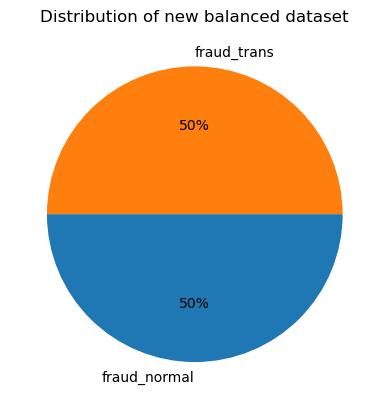

In [78]:
#Distribution of new balanced dataset
plt.pie(
        [len(df_balanced[df_balanced['isFraud'] == 1]), len(df_balanced[df_balanced['isFraud'] == 0])],
        labels=['fraud_trans','fraud_normal'],
        autopct='%1.0f%%',
        colors=['tab:orange', 'tab:blue']
       )
plt.title('Distribution of new balanced dataset')
plt.show()

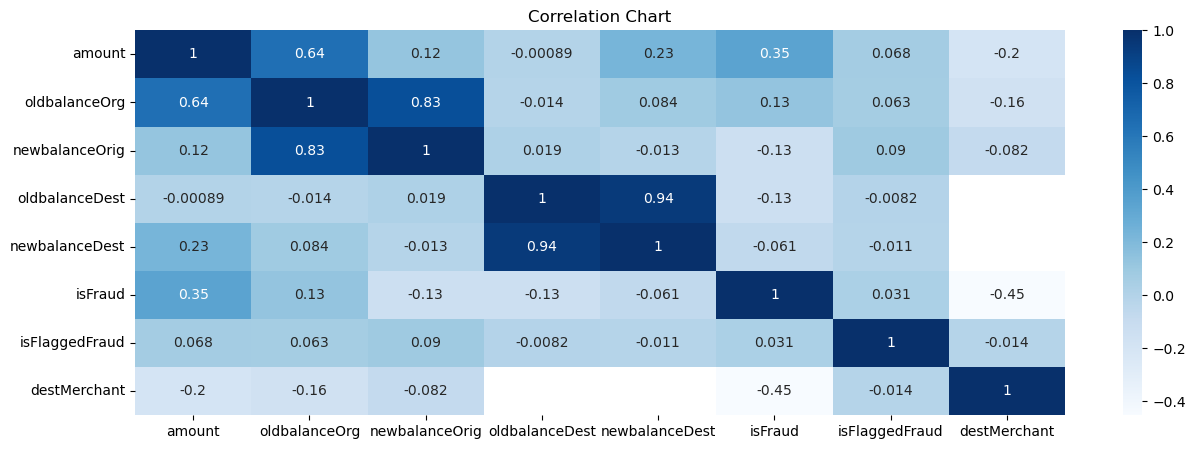

In [79]:
plt.figure(figsize=(15,5))
sns.heatmap(df_balanced.corr(), cmap='Blues', annot=True)
plt.title('Correlation Chart')
plt.show()

In [82]:
df_balanced.isna().sum()

type                 0
amount               0
oldbalanceOrg        0
newbalanceOrig       0
oldbalanceDest    2793
newbalanceDest    2793
isFraud              0
isFlaggedFraud       0
destMerchant         0
dtype: int64

In [92]:
df_balanced = df_balanced.fillna(0)

In [93]:
#Splitting the dataset into independent and dependent variables
X = df_balanced.drop('isFraud', axis=1)
y = df_balanced['isFraud']

In [94]:
X = pd.get_dummies(X)
display(X.head())

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,destMerchant,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,181.0,181.0,0.0,0.0,0.0,0,0,0,0,0,0,1
1,181.0,181.0,0.0,21182.0,0.0,0,0,0,1,0,0,0
2,2806.0,2806.0,0.0,0.0,0.0,0,0,0,0,0,0,1
3,2806.0,2806.0,0.0,26202.0,0.0,0,0,0,1,0,0,0
4,20128.0,20128.0,0.0,0.0,0.0,0,0,0,0,0,0,1


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

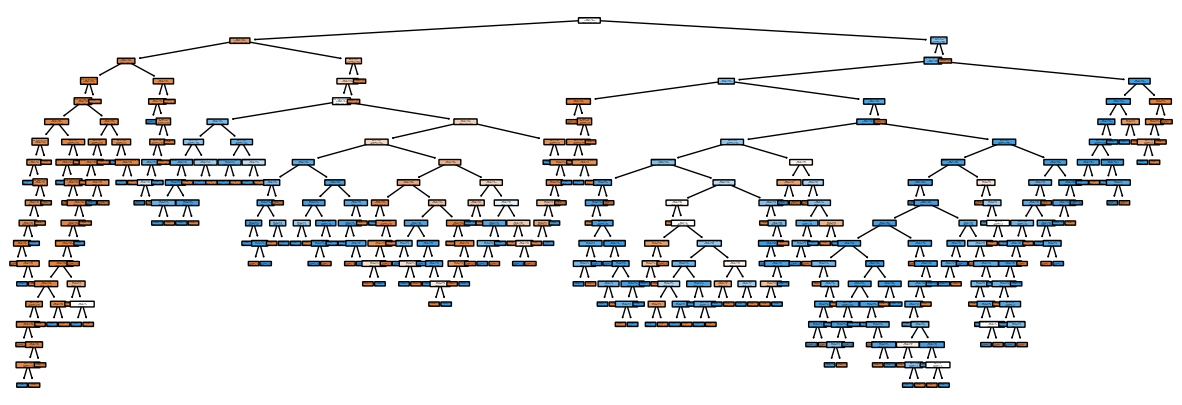

In [98]:
n_tree = 50

fig = plt.figure(figsize=(15, 5))
plot_tree(
          model.estimators_[n_tree],
          feature_names=X.columns,
          filled=True, impurity=True, rounded=True
         )
plt.show()

Our tree has many branches, to make it even more visual, we will plot the same tree below but with only two branches below our root node.

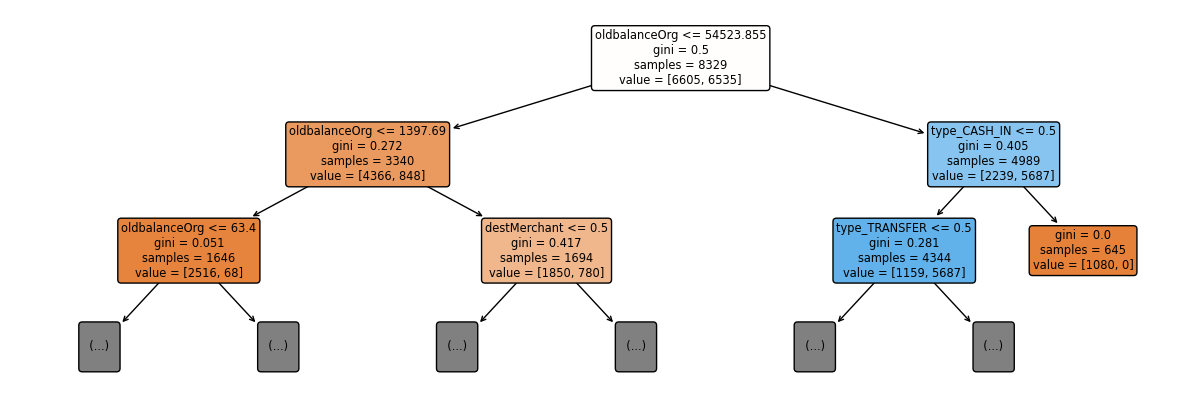

In [100]:
fig = plt.figure(figsize=(15, 5))
plot_tree(
          model.estimators_[n_tree],
          feature_names=X.columns,
          max_depth=2,
          filled=True, impurity=True, rounded=True
         )
plt.show()

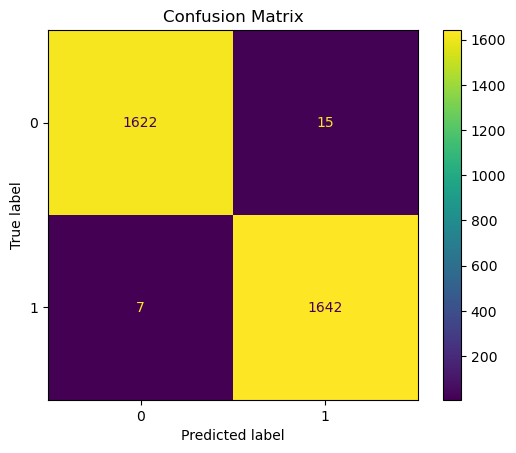



Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1637
           1       0.99      1.00      0.99      1649

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



In [101]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_)
cm.plot()
plt.title('Confusion Matrix')
plt.show()

print('\n\nClassification Report:\n\n',classification_report(y_test, y_pred))

From the confusion matrix we see that:

The model matched 1622 transactions that were not fraudulent and 1642 that were
The model missed 15 transactions that were not fraudulent by saying they were and 7 that were by saying they weren't.
Complementing with the classification report, we have that, our model obtained:

99% accuracy in your classifications.
100% accuracy on transactions that were not fraud and 99% on those that were
100% recall on fraud and 99% on normal transactions.
In other words, excellent results.

We were able to analyze which were the most relevant characteristics for the prediction of the model:

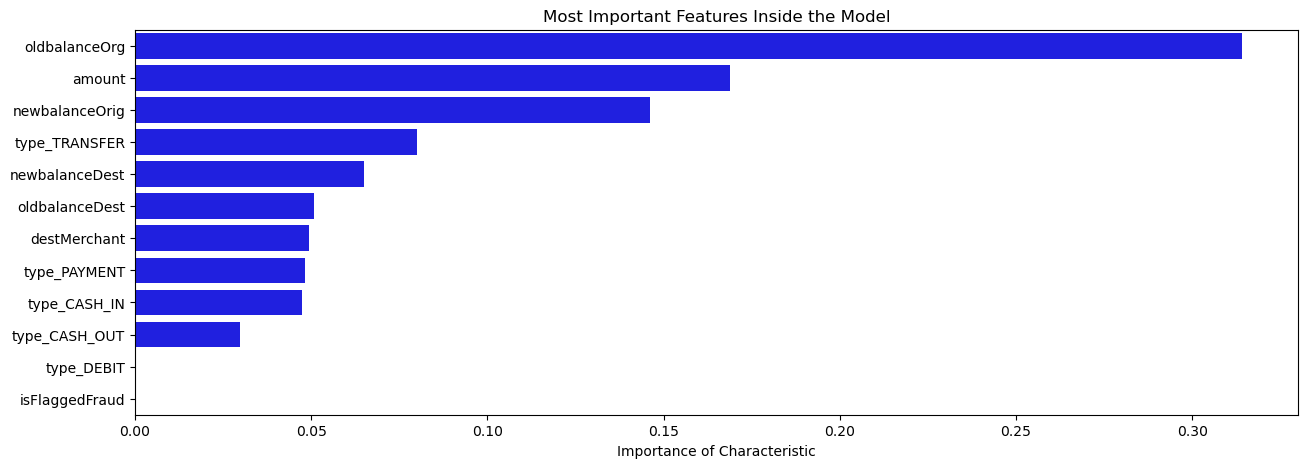

In [103]:
feature_importances = pd.DataFrame(model.feature_importances_, X.columns)
feature_importances = feature_importances.sort_values(by=0, ascending=False)
feature_importances = feature_importances.rename(columns={0: 'Importance of Characteristic'})

#Plotar grafico
plt.figure(figsize=(15,5))
sns.barplot(x=feature_importances['Importance of Characteristic'], y=feature_importances.index, color='blue')
plt.title('Most Important Features Inside the Model')
plt.show()